In [1]:
import warnings
warnings.filterwarnings("ignore")

import datetime
import inspect
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
import sympy as sym

In [2]:
repo_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

confirmed_url = repo_url + 'time_series_covid19_confirmed_global.csv'
deaths_url = repo_url + 'time_series_covid19_deaths_global.csv'

In [3]:
data_confirmed = pd.read_csv(confirmed_url)
data_deaths = pd.read_csv(deaths_url)

In [4]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,37187,37664,38133,38583,39025,39444,39847,40258,40667,41068
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,981,989,989,989,1005,1005,1024,1024,1045,1045
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1815,1852,1879,1906,1935,1966,2015,2044,2068,2134


In [5]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,213,219,225,228,230,232,234,238,240,245
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1341,1351,1360,1370,1379,1391,1402,1411,1418,1424
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,80,86,86,88,88,90,92,93,94,94


In [6]:
data_argentina_confirmed = data_confirmed[data_confirmed['Country/Region'] == 'Argentina']
data_argentina_deaths = data_deaths[data_deaths['Country/Region'] == 'Argentina']

In [7]:
data_argentina_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,276072,282437,289100,294569,299126,305966,312659,320884,329043,336802


In [8]:
data_argentina_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,5362,5527,5637,5703,5814,6048,6330,6517,6730,6848


In [9]:
del data_argentina_confirmed['Lat']
del data_argentina_confirmed['Long']
del data_argentina_confirmed['Province/State']

del data_argentina_deaths['Lat']
del data_argentina_deaths['Long']
del data_argentina_deaths['Province/State']

In [10]:
data_argentina_confirmed.rename(columns={'Country/Region':'Date'}, inplace=True)
data_argentina_deaths.rename(columns={'Country/Region':'Date'}, inplace=True)

In [11]:
data_argentina_confirmed = data_argentina_confirmed.T
data_argentina_deaths = data_argentina_deaths.T

In [12]:
data_argentina_confirmed.head()

,6
Date,Argentina
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0


In [13]:
data_argentina_confirmed.columns = data_argentina_confirmed.iloc[0]
data_argentina_deaths.columns = data_argentina_deaths.iloc[0]

In [14]:
data_argentina_confirmed = data_argentina_confirmed.iloc[1:]
data_argentina_deaths = data_argentina_deaths.iloc[1:]

In [15]:
data_argentina_confirmed.rename(columns={'Argentina':'Total'}, inplace=True)
data_argentina_deaths.rename(columns={'Argentina':'Total'}, inplace=True)

In [16]:
data_argentina_confirmed.index = pd.to_datetime(data_argentina_confirmed.index.astype(str), format='%m/%d/%y')
data_argentina_deaths.index = pd.to_datetime(data_argentina_deaths.index.astype(str), format='%m/%d/%y')

In [17]:
data_argentina_confirmed.drop(data_argentina_confirmed[data_argentina_confirmed.index < '2020-03-01'].index, inplace=True)
data_argentina_deaths.drop(data_argentina_deaths[data_argentina_deaths.index < '2020-03-01'].index, inplace=True)

In [18]:
data_argentina_confirmed.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,1
2020-03-04,1
2020-03-05,1


In [19]:
def completeWithMean(column):
    return (column.shift() + column.shift(-1)) / 2

duplicated = data_argentina_confirmed.duplicated('Total')
data_argentina_confirmed.loc[duplicated, ['Total']] = np.NaN

data_argentina_confirmed.Total = np.where(data_argentina_confirmed['Total'].isnull(),
         completeWithMean(data_argentina_confirmed['Total']),
         data_argentina_confirmed['Total'])

data_argentina_confirmed.fillna(method='pad', inplace=True)
data_argentina_confirmed.Total = data_argentina_confirmed.Total.round().astype(int)

In [20]:
data_argentina_confirmed['New'] = (data_argentina_confirmed.Total - data_argentina_confirmed.Total.shift(1)).fillna(0).astype(int)

In [21]:
data_argentina_deaths.head()

Date,Total
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,0
2020-03-05,0


In [22]:
data_argentina_deaths['New'] = (data_argentina_deaths.Total - data_argentina_deaths.Total.shift(1)).fillna(0)

In [23]:
data_argentina = pd.merge(data_argentina_confirmed, data_argentina_deaths
                          , left_index=True, right_index=True
                          , suffixes=('ConfirmedCases', 'DeathCases'))

In [24]:
data_argentina

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases
2020-03-01,0,0,0,0
2020-03-02,0,0,0,0
2020-03-03,1,1,0,0
2020-03-04,1,0,0,0
2020-03-05,1,0,0,0
...,...,...,...,...
2020-08-18,305966,6840,6048,234
2020-08-19,312659,6693,6330,282
2020-08-20,320884,8225,6517,187
2020-08-21,329043,8159,6730,213


<AxesSubplot:title={'center':'Total Cases'}>

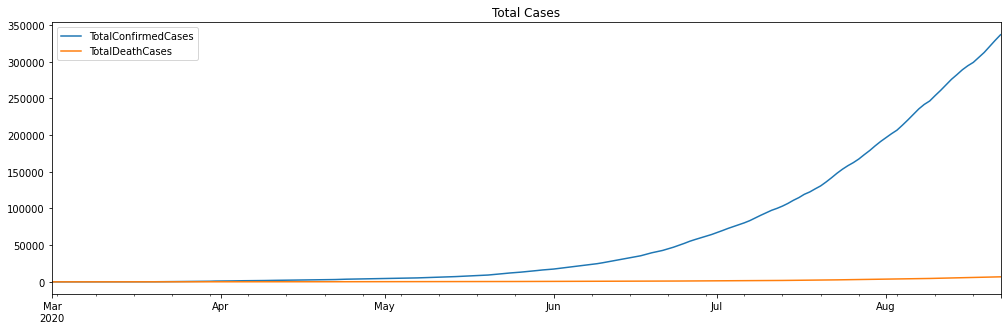

In [25]:
data_argentina.TotalConfirmedCases.plot(figsize=(17, 5), title="Total Cases", legend=True)
data_argentina.TotalDeathCases.plot(figsize=(17, 5), legend=True)

<AxesSubplot:title={'center':'New Cases'}>

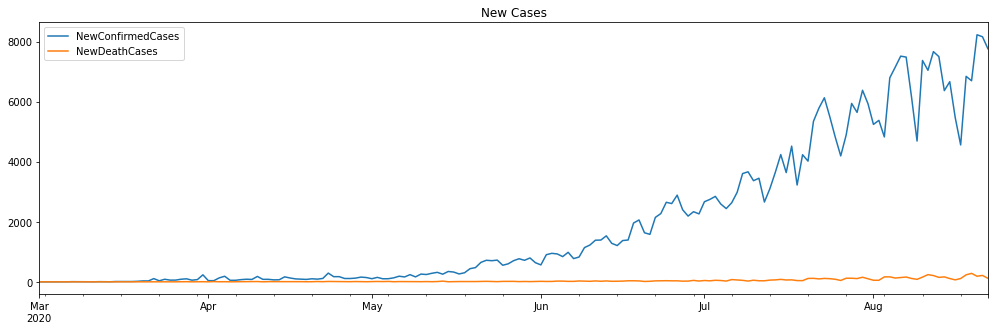

In [26]:
data_argentina.NewConfirmedCases.plot(figsize=(17, 5), title="New Cases", legend=True)
data_argentina.NewDeathCases.plot(figsize=(17, 5), legend=True)

In [27]:
data_argentina_confirmed

Date,Total,New
2020-03-01,0,0
2020-03-02,0,0
2020-03-03,1,1
2020-03-04,1,0
2020-03-05,1,0
...,...,...
2020-08-18,305966,6840
2020-08-19,312659,6693
2020-08-20,320884,8225
2020-08-21,329043,8159


In [28]:
data_argentina['num_id'] = np.arange(len(data_argentina) + 1)[1:]

In [29]:
#Testing only
#data_argentina = data_argentina.head(45)

In [30]:
data_argentina.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-01,0,0,0,0,1
2020-03-02,0,0,0,0,2
2020-03-03,1,1,0,0,3
2020-03-04,1,0,0,0,4
2020-03-05,1,0,0,0,5


In [31]:
data_argentina.tail()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-08-18,305966,6840,6048,234,171
2020-08-19,312659,6693,6330,282,172
2020-08-20,320884,8225,6517,187,173
2020-08-21,329043,8159,6730,213,174
2020-08-22,336802,7759,6848,118,175


In [32]:
predicted_days = 30
firstPredictionDay = data_argentina.index[-1] + datetime.timedelta(days = 1)

In [33]:
# testing only (remove last row to check results)
#data_argentina.drop(data_argentina.tail(1).index,inplace=True)

In [34]:
class Models:    
    def cuadratic_model(x, a, b, c):
        return (a*x**2 + b*x +c)

    def cubic_model(x, a, b, c, d):
        return (a*x**3 + b*x**2 +c*x + d)
    
    def fourth_pow_model(x, a, b, c, d, e):
        return (a*x**4 + b*x**3 +c*x**2 + d*x + e)
    
#    def fiveth_pow_model(x, a, b, c, d, e, f):
#        return (a*x**5 + b*x**4 +c*x**3 + d*x**2 + e*x + f)
#    
#    def sixh_pow_model(x, a, b, c, d, e, f, g):
#        return (a*x**6 + b*x**5 +c*x**4 + d*x**3 + e*x**2 + f*x + g)
#    
#    def exp_model(x, c, k):
#        return c * np.exp(k * x)

In [35]:
def formatPrediction(firstPredictionDay, day, prediction):
    formatedDate = str(firstPredictionDay + datetime.timedelta(days = day))[0:10]
    formatedPrediction = str(int(prediction))
    return "|" + formatedDate + " | " + formatedPrediction + "|"

def printPrediction(model, popt, x, y):
    firstPredictionDayId = x.max() + 1
    print("--- Predictions ---")
    for day in range (0, predicted_days):
        predictionId = firstPredictionDayId + day
        predictionValue = model(predictionId, *popt)
        print(formatPrediction(firstPredictionDay, day, predictionValue))
    print("-------------------")

In [36]:
def printFuncionParameters(model, popt):
        print('\n', model.__name__)
        args = inspect.getfullargspec(model).args[1:]
        for arg, value in zip(args, popt):
            print( arg, " = ", value)

def plotPrediction(model, popt, x, y):
    plt.figure()
    try:
        xs = sym.Symbol('\lambda')    
        tex = sym.latex(model(xs,*popt)).replace('$', '')
        plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=12)
    except:
        printFuncionParameters(model, popt)

    plt.plot(x, model(x, *popt))
    plt.plot(x, y, 'ro')
    plt.show()

In [37]:
def predictData(model, x, y):
    popt, _ = curve_fit(model, x, y)
    printPrediction(model, popt, x, y)
    plotPrediction(model, popt, x, y)
    return popt

cuadratic_model
--- Predictions ---
|2020-08-23 | 300281|
|2020-08-24 | 305387|
|2020-08-25 | 310533|
|2020-08-26 | 315719|
|2020-08-27 | 320947|
|2020-08-28 | 326215|
|2020-08-29 | 331525|
|2020-08-30 | 336875|
|2020-08-31 | 342265|
|2020-09-01 | 347697|
|2020-09-02 | 353169|
|2020-09-03 | 358683|
|2020-09-04 | 364237|
|2020-09-05 | 369831|
|2020-09-06 | 375467|
|2020-09-07 | 381143|
|2020-09-08 | 386861|
|2020-09-09 | 392619|
|2020-09-10 | 398417|
|2020-09-11 | 404257|
|2020-09-12 | 410137|
|2020-09-13 | 416059|
|2020-09-14 | 422021|
|2020-09-15 | 428023|
|2020-09-16 | 434067|
|2020-09-17 | 440151|
|2020-09-18 | 446277|
|2020-09-19 | 452443|
|2020-09-20 | 458649|
|2020-09-21 | 464897|
-------------------


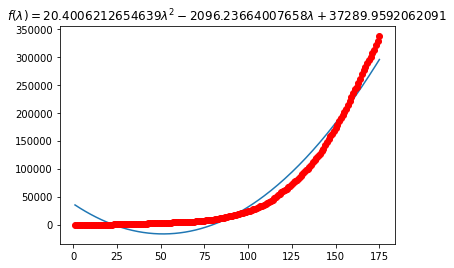

cubic_model
--- Predictions ---
|2020-08-23 | 346537|
|2020-08-24 | 354796|
|2020-08-25 | 363185|
|2020-08-26 | 371705|
|2020-08-27 | 380356|
|2020-08-28 | 389141|
|2020-08-29 | 398059|
|2020-08-30 | 407113|
|2020-08-31 | 416302|
|2020-09-01 | 425628|
|2020-09-02 | 435092|
|2020-09-03 | 444695|
|2020-09-04 | 454438|
|2020-09-05 | 464321|
|2020-09-06 | 474347|
|2020-09-07 | 484516|
|2020-09-08 | 494828|
|2020-09-09 | 505285|
|2020-09-10 | 515889|
|2020-09-11 | 526639|
|2020-09-12 | 537537|
|2020-09-13 | 548584|
|2020-09-14 | 559781|
|2020-09-15 | 571129|
|2020-09-16 | 582628|
|2020-09-17 | 594281|
|2020-09-18 | 606087|
|2020-09-19 | 618049|
|2020-09-20 | 630166|
|2020-09-21 | 642441|
-------------------


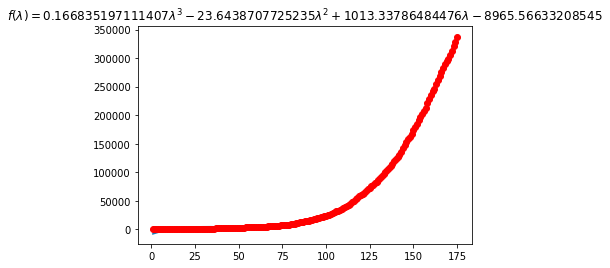

fourth_pow_model
--- Predictions ---
|2020-08-23 | 352683|
|2020-08-24 | 361640|
|2020-08-25 | 370763|
|2020-08-26 | 380053|
|2020-08-27 | 389512|
|2020-08-28 | 399143|
|2020-08-29 | 408947|
|2020-08-30 | 418926|
|2020-08-31 | 429082|
|2020-09-01 | 439417|
|2020-09-02 | 449933|
|2020-09-03 | 460633|
|2020-09-04 | 471518|
|2020-09-05 | 482590|
|2020-09-06 | 493851|
|2020-09-07 | 505304|
|2020-09-08 | 516950|
|2020-09-09 | 528791|
|2020-09-10 | 540830|
|2020-09-11 | 553069|
|2020-09-12 | 565509|
|2020-09-13 | 578153|
|2020-09-14 | 591004|
|2020-09-15 | 604062|
|2020-09-16 | 617331|
|2020-09-17 | 630812|
|2020-09-18 | 644508|
|2020-09-19 | 658421|
|2020-09-20 | 672553|
|2020-09-21 | 686906|
-------------------


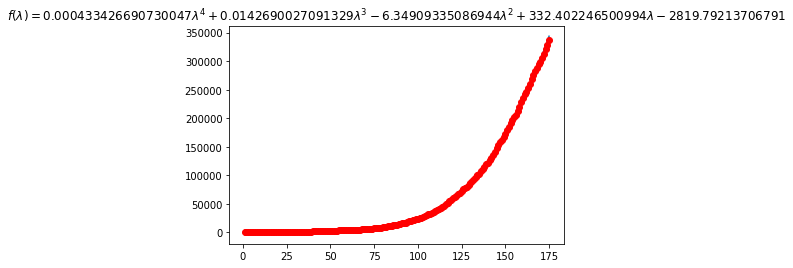

In [38]:
def isModel(methodName):
    return not(methodName.startswith('__'))

for methodName in dir(Models):
    if(isModel(methodName)):
        print(methodName)
        predictData(getattr(Models, methodName), data_argentina.num_id, data_argentina.TotalConfirmedCases)

----------------------------

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:>

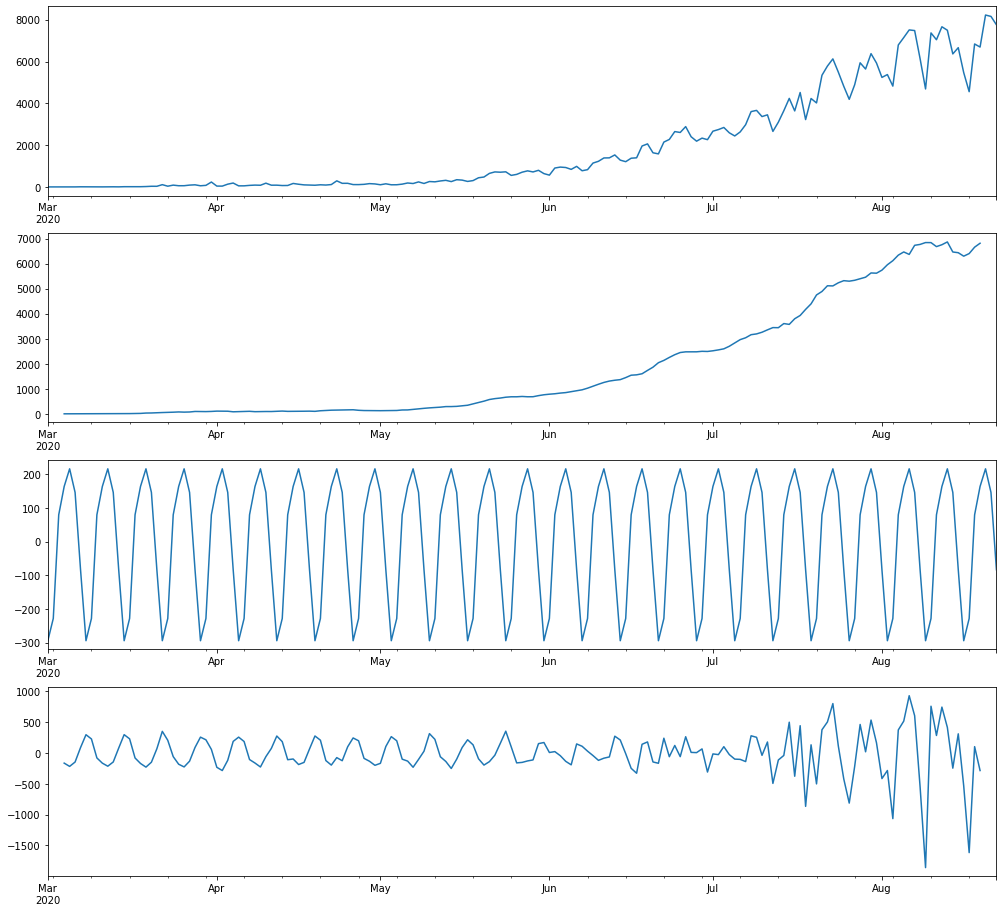

In [40]:
series = data_argentina.NewConfirmedCases
res = seasonal_decompose(series, model='additive')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(17,16))
res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)

In [41]:
data_argentina_filter_zero = data_argentina[data_argentina['NewConfirmedCases'] > 0]

In [42]:
data_argentina_filter_zero.head()

Date,TotalConfirmedCases,NewConfirmedCases,TotalDeathCases,NewDeathCases,num_id
2020-03-03,1,1,0,0,3
2020-03-06,2,1,0,0,6
2020-03-07,8,6,0,0,7
2020-03-08,12,4,1,1,8
2020-03-09,14,2,1,0,9


<AxesSubplot:>

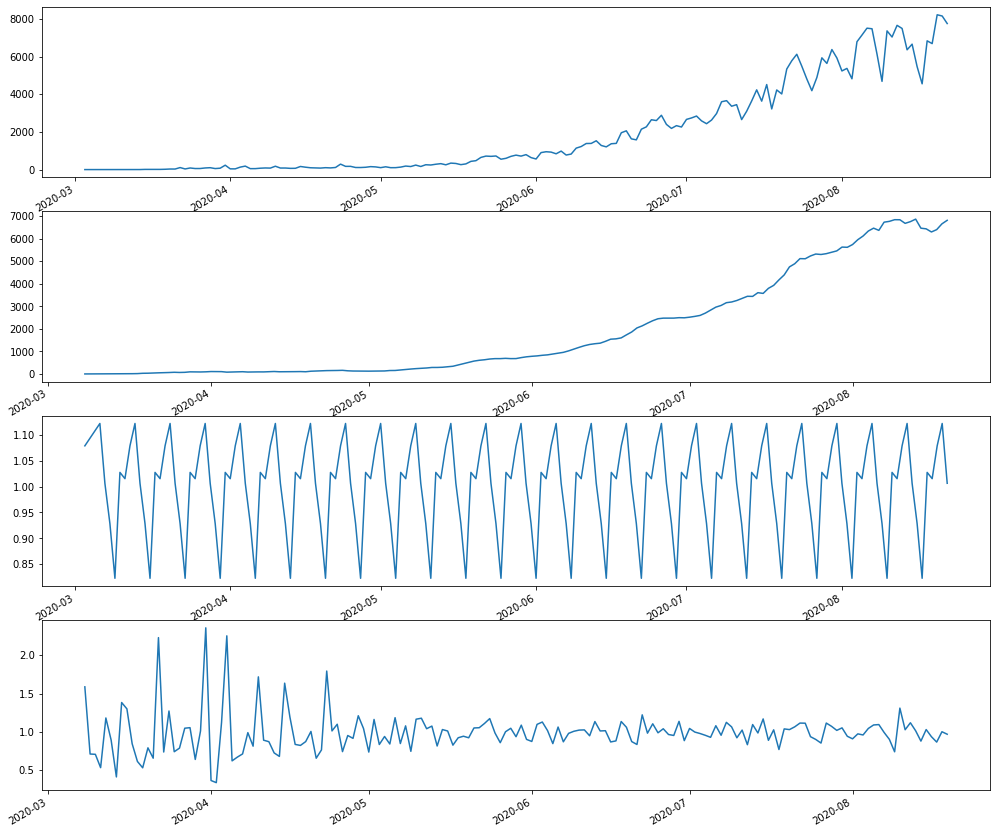

In [43]:
series = data_argentina_filter_zero.NewConfirmedCases
res = seasonal_decompose(series, model='multiplicative', freq=7)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(17,16))
res.observed.plot(ax=ax1)
res.trend.plot(ax=ax2)
res.seasonal.plot(ax=ax3)
res.resid.plot(ax=ax4)

------

In [ ]:
data_argentina.head(60)

In [ ]:
df_prophet_aux = data_argentina.drop(['NewConfirmedCases','TotalDeathCases','NewDeathCases','num_id'], axis=1).reset_index()
df_prophet = pd.DataFrame()
df_prophet['ds'] = df_prophet_aux['index']
df_prophet['y'] = df_prophet_aux['TotalConfirmedCases']
df_prophet.head(60)

In [ ]:
df_prophet.columns

In [ ]:
from fbprophet import Prophet
m = Prophet(growth='logistic') # the Prophet class (model)
m.fit(df_prophet) # fit the model using all data

In [ ]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction Stock Price using Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [ ]:
m.plot_components(prediction)
plt.show()